# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [2]:
# Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


#### We are trying to predict where a possum lives. In our dataset, the `pop` column either lists `Vic` or `other`, with `Vic` short for Victoria. Our goal is to make a classification model that will predict whether a possum lives in Victoria or somewhere else.

### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [3]:
df = pd.read_csv('data/possum.csv')

In [4]:
df.head(10)

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0
5,1,Vic,f,1.0,93.1,54.8,90.5,35.5
6,1,Vic,m,2.0,95.3,58.2,89.5,36.0
7,1,Vic,f,6.0,94.8,57.6,91.0,37.0
8,1,Vic,f,9.0,93.4,56.3,91.5,37.0
9,1,Vic,f,6.0,91.8,58.0,89.5,37.5


### Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [5]:
df.shape

(104, 8)

In [6]:
#Baseline Score
# For regression - this is our model's performance if I guessed the mean each time
# R2, mean_squared_error, mean_absolute_error


# For classification - this is our model's performance of the mode (most common category)
# The percentage in the majority class(i.e. Predicting 'other' every single time)

baseline = (df['pop'].value_counts(normalize=True) * 100)

# doing df['pop'] is industry standard vs. df.pop
# My baseline accuracy is 55.8% If I had a model predict 'other' each time, it would right 
# #55.8% of the time. This is our goal to beat!

baseline


pop
other    55.769231
Vic      44.230769
Name: proportion, dtype: float64

In [7]:
df.isnull().sum()

site       0
pop        0
sex        0
age        2
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [8]:
# Deal with the missing values
#Instead of dropping the values, we can fill them with the mean when we don't have a ton of null values

# We cannot fit a model if there are any missing values

mean_value = df['age'].mean()
mean_value

df['age'].fillna(mean_value, inplace=True) #this replaces the null values in place

#other method
df['age'] = df['age'].fillna(mean_value) #this fills the 



In [9]:
df.isnull().sum()
#YAY! No null values!

site       0
pop        0
sex        0
age        0
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [10]:
df.dtypes

site         int64
pop         object
sex         object
age        float64
head_l     float64
skull_w    float64
total_l    float64
tail_l     float64
dtype: object

In [11]:
#Since there is only one column to encode, we can do it on the fly
# Convert sex m/f to 1/0
df['sex_m'] = df['sex'].map({'m': 1, 'f': 0})
df.drop(columns= 'sex', inplace=True)
df.head()

,site,pop,age,head_l,skull_w,total_l,tail_l,sex_m
0,1,Vic,8.0,94.1,60.4,89.0,36.0,1
1,1,Vic,6.0,92.5,57.6,91.5,36.5,0
2,1,Vic,6.0,94.0,60.0,95.5,39.0,0
3,1,Vic,6.0,93.2,57.1,92.0,38.0,0
4,1,Vic,2.0,91.5,56.3,85.5,36.0,0


In [12]:
import seaborn as sns

In [13]:
df['pop'] = df['pop'].map({'Vic': 1, 'other': 0})

In [14]:
df.corr() #use numeric_only = True in () if you have categorical data still

,site,pop,age,head_l,skull_w,total_l,tail_l,sex_m
site,1.000000,-0.892326,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,0.232817
pop,-0.892326,1.000000,0.085747,-0.001267,-0.065908,0.078666,-0.490856,-0.195811
age,-0.130799,0.085747,1.000000,0.311848,0.279955,0.250970,0.117274,-0.063995
head_l,-0.163646,-0.001267,0.311848,1.000000,0.710827,0.691094,0.287429,0.107200
skull_w,-0.083548,-0.065908,0.279955,0.710827,1.000000,0.526413,0.255921,0.080014
total_l,-0.260843,0.078666,0.250970,0.691094,0.526413,1.000000,0.565646,-0.160200
tail_l,0.380444,-0.490856,0.117274,0.287429,0.255921,0.565646,1.000000,-0.040917
sex_m,0.232817,-0.195811,-0.063995,0.107200,0.080014,-0.160200,-0.040917,1.000000


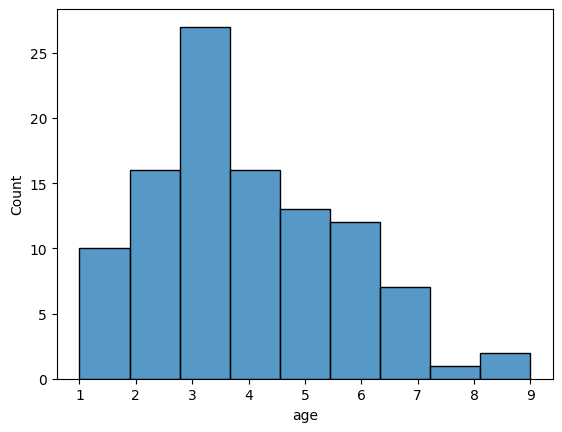

In [15]:
sns.histplot(df['age']);

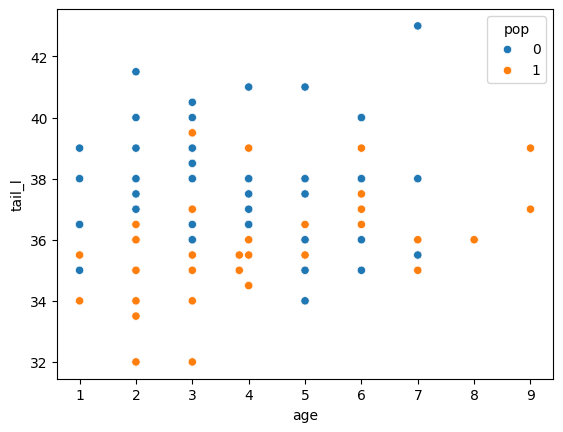

In [16]:
sns.scatterplot(x = df['age'], y= df['tail_l'], hue=df['pop']);

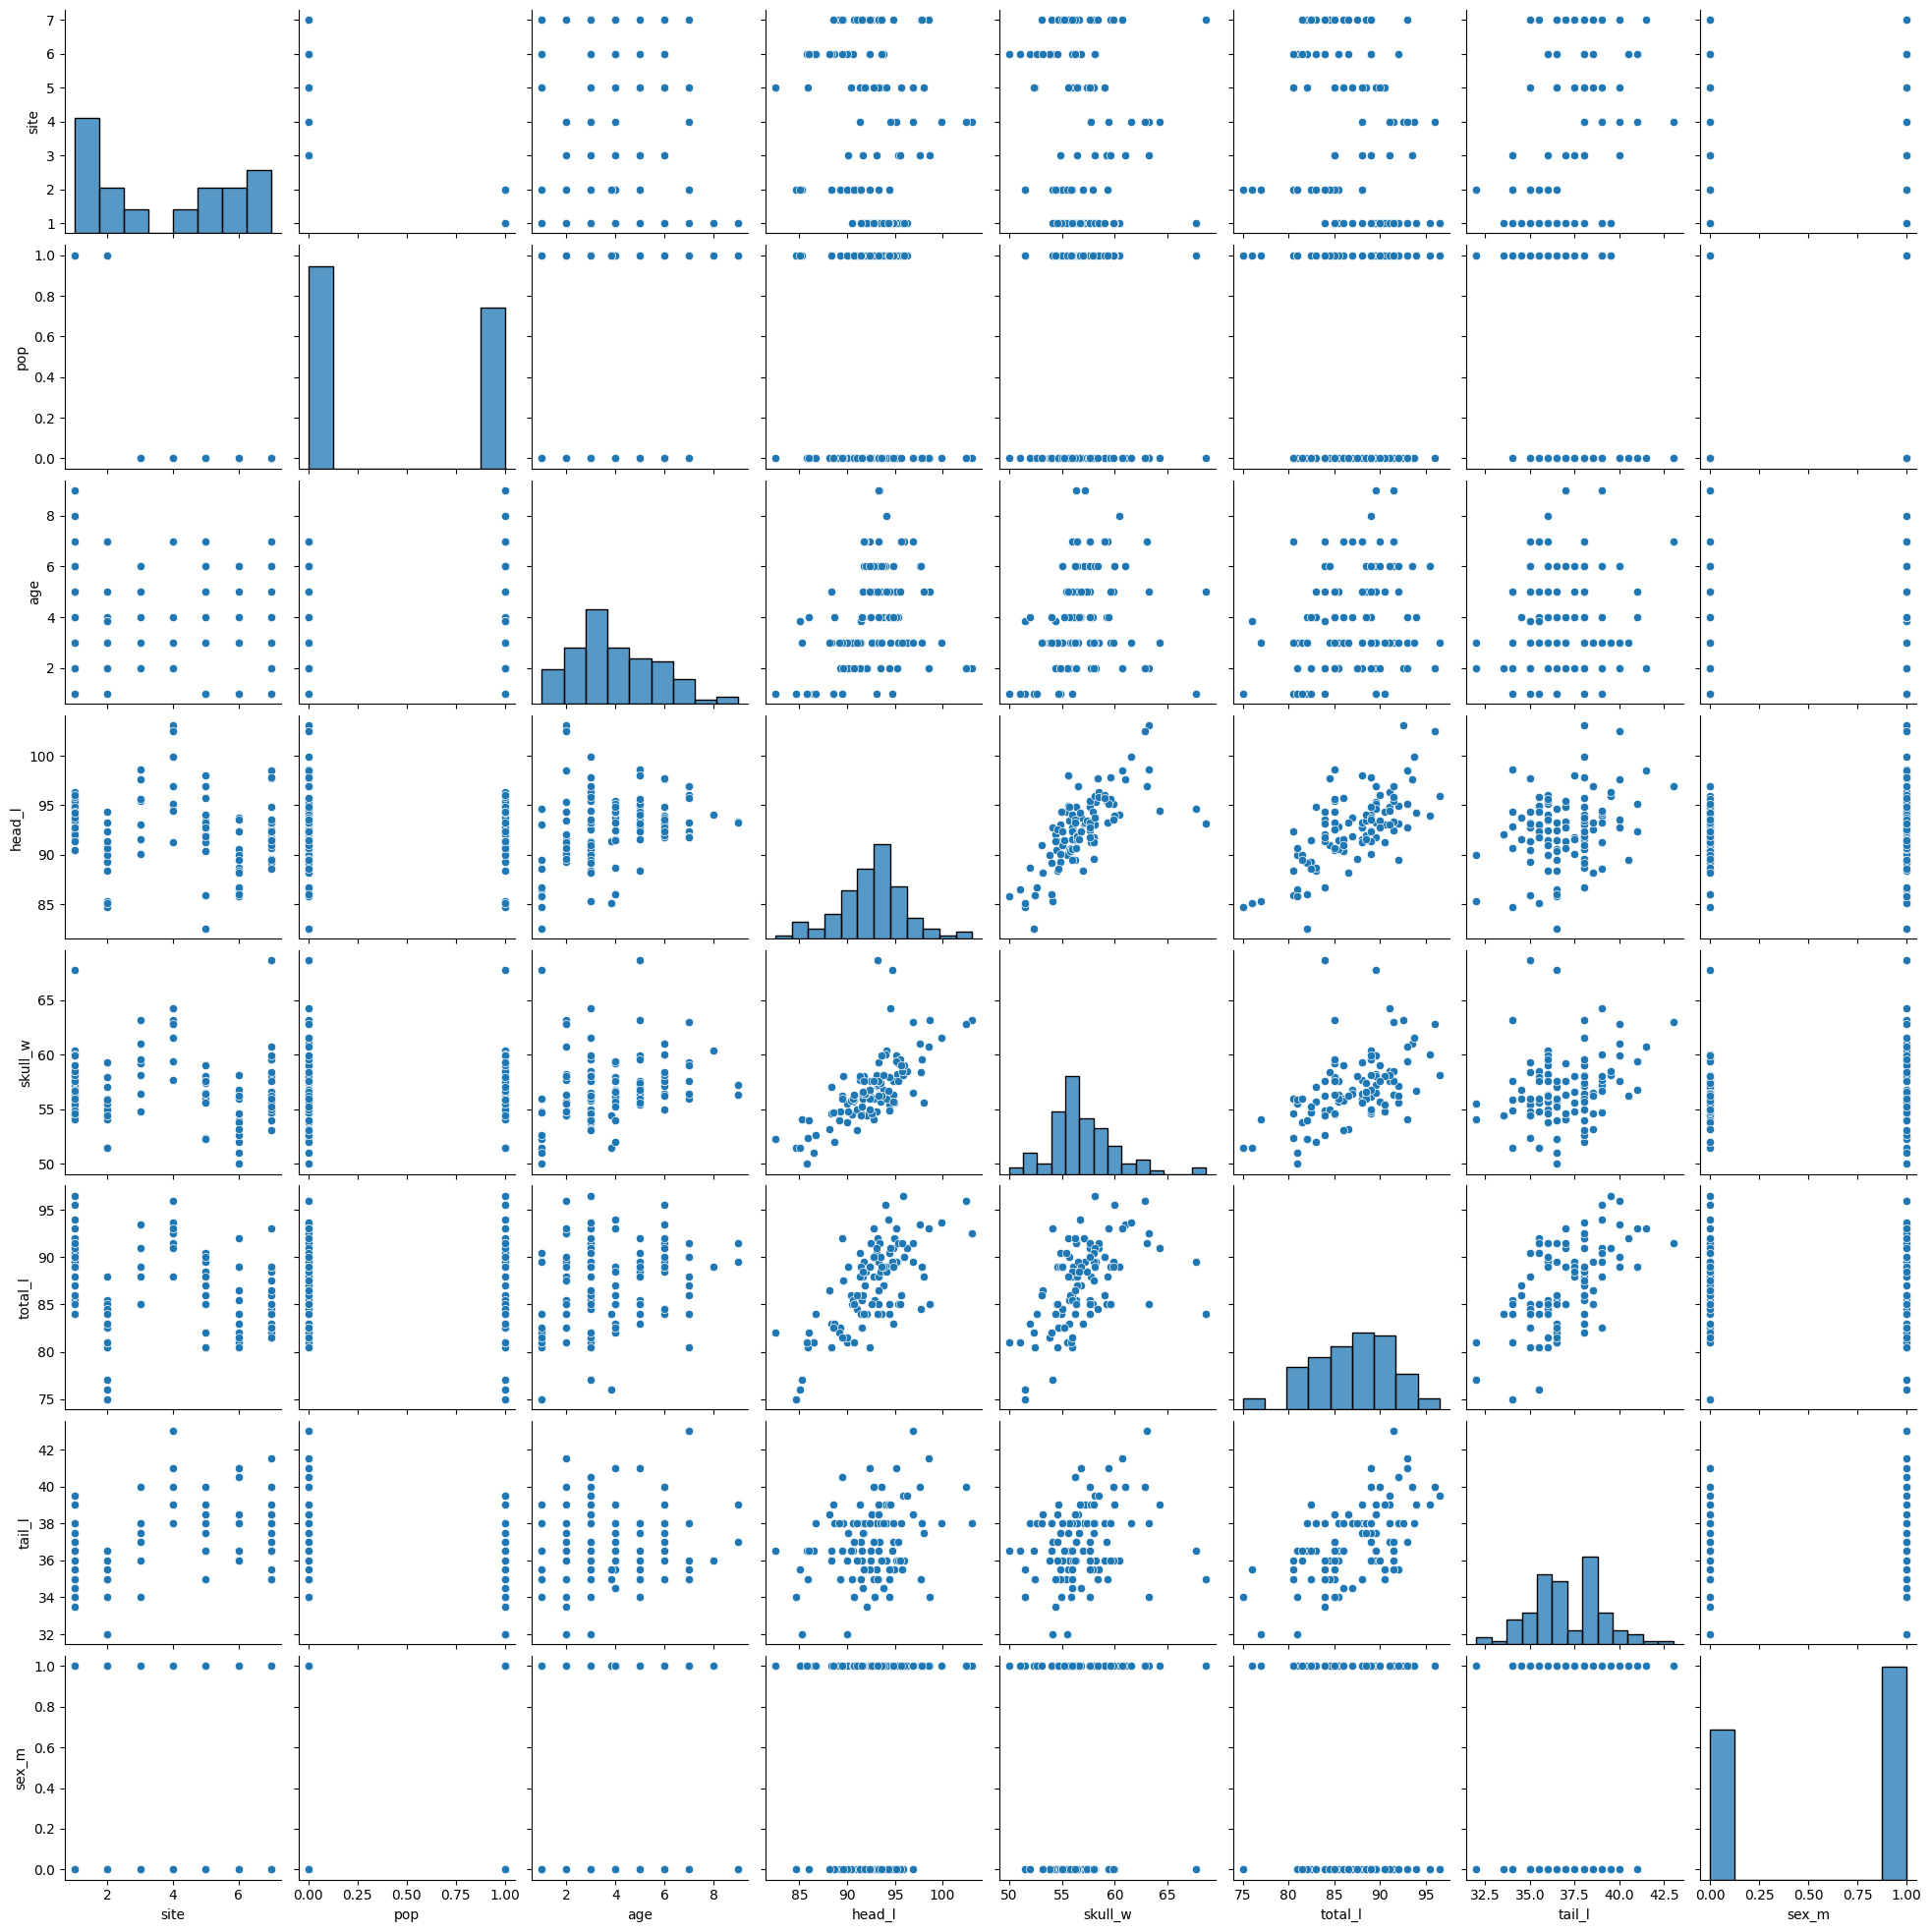

In [17]:
sns.pairplot(df);
#Don't do this for more than 10 columns

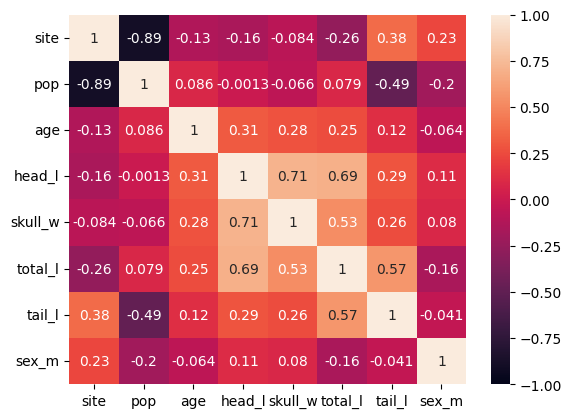

In [18]:
sns.heatmap(df.corr(), annot= True, vmin=-1);

### Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

In [19]:
#X is a matrix
X = df.drop(columns='pop')
y = df['pop']

In [20]:
# Train test split!
# Note: We do this to preserve data to evaluate our model on unseen data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42, stratify=y)
#stratify is optional

In [21]:
#Stratify if you want your test and train ratios are close. 
#This can be helpful if there is a large skew 
print(y.value_counts(normalize=True))
print('-----------')
print(y_train.value_counts(normalize=True))
print('-----------')
print(y_test.value_counts(normalize=True))

pop
0    0.557692
1    0.442308
Name: proportion, dtype: float64
-----------
pop
0    0.554217
1    0.445783
Name: proportion, dtype: float64
-----------
pop
0    0.571429
1    0.428571
Name: proportion, dtype: float64


In [22]:
# Instantiate your model!
logreg = LogisticRegression(random_state=42, solver='liblinear')

In [23]:
# Fit the model ON TRAINING SET! NEVER DO IT ON TEST!!!

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [24]:
logreg.score(X_train, y_train)

1.0

In [25]:
logreg.score(X_test, y_test)

1.0

### Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.

In [26]:
X_test

,site,age,head_l,skull_w,total_l,tail_l,sex_m
7,1,6.000000,94.8,57.6,91.0,37.0,0
66,5,4.000000,93.3,57.6,85.0,36.5,1
43,2,3.833333,85.1,51.5,76.0,35.5,1
3,1,6.000000,93.2,57.1,92.0,38.0,0
1,1,6.000000,92.5,57.6,91.5,36.5,0
97,7,5.000000,93.2,68.6,84.0,35.0,1
88,7,6.000000,97.7,58.4,84.5,35.0,1
16,1,1.000000,94.7,67.7,89.5,36.5,0
103,7,3.000000,93.6,59.9,89.0,40.0,0
93,7,7.000000,91.8,57.6,84.0,35.5,1


In [27]:
logreg.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [28]:
#This is a white box. It means we can extra coefficients and more but might not perform the best. 
#Black box - put data in, get data out. But we can't explain how it made those decisions
logreg.predict_proba(X_test).round(3)

array([[0.015, 0.985],
       [0.998, 0.002],
       [0.181, 0.819],
       [0.022, 0.978],
       [0.031, 0.969],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.096, 0.904],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.989, 0.011],
       [0.976, 0.024],
       [0.989, 0.011],
       [0.01 , 0.99 ],
       [0.998, 0.002],
       [1.   , 0.   ],
       [0.132, 0.868],
       [0.011, 0.989],
       [0.998, 0.002],
       [0.36 , 0.64 ],
       [1.   , 0.   ]])

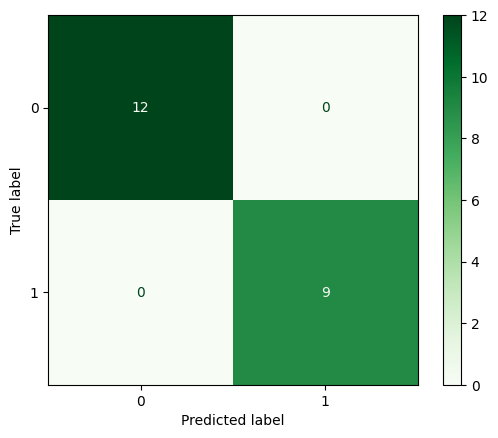

In [29]:
#Option 1
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Greens');

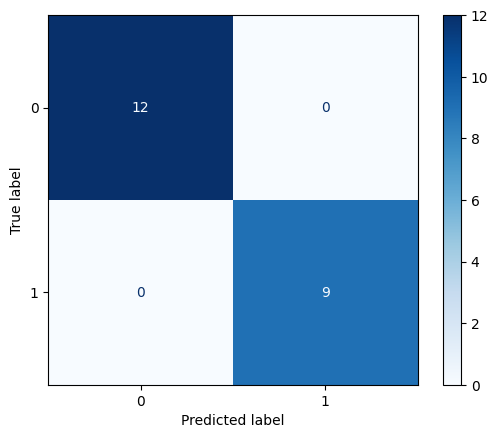

In [30]:
#Option 2
ConfusionMatrixDisplay.from_predictions(y_pred= logreg.predict(X_test), y_true = y_test, cmap= 'Blues');

In [31]:
# Check out some coefficients!
pd.Series(logreg.coef_[0], index = X.columns)

site      -2.575038
age       -0.123791
head_l     0.295334
skull_w   -0.259021
total_l   -0.077019
tail_l     0.034838
sex_m     -0.172735
dtype: float64

In [32]:
#How do we interpret our coefficients?
import numpy as np

#Interpretting the tail length coeffient:
np.exp(-0.172735)


0.8413605458496106

In [33]:
#If the number above is less than 1, then that means it is 1 - np.exp(coef) less likely to be in our target
#If the number abvove is more than 1, then that means it is np.exp(coef) times as likely to be our target

What this is saying, is that ALL ELSE HELD CONSTANT, a 1 unit increase in a possum's tail length suggests that it is 15.9% less likely to live in Vic region